word2vec - skip-gram (2013) - CBOW (2013) -> GloVe (2014) -> fastText (2017) -> ELMo (2018) -> GPT（Generative Pre Training) (2018) -> BERT (2018) -> RoBERTa (2019)

https://www.kaggle.com/code/mohamedabdelmohsen/emotion-analysis-and-classification-using-lstm-93

https://www.kaggle.com/datasets/bhavikardeshna/visual-question-answering-computer-vision-nlp/code

https://medium.com/data-science-at-microsoft/visual-question-answering-with-multimodal-transformers-d4f57950c867

https://github.com/tezansahu/VQA-With-Multimodal-Transformers/blob/main/notebooks/VisualQuestionAnsweringWithTransformers.ipynb

https://github.com/tezansahu/VQA-With-Multimodal-Transformers

https://www.kaggle.com/code/arunmohan003/question-answering-using-bert

https://www.mlq.ai/fine-tuning-gpt-3-recommendations/

https://mccormickml.com/2019/07/22/BERT-fine-tuning/

https://luv-bansal.medium.com/fine-tuning-bert-for-text-classification-in-pytorch-503d97342db2

**1. What is BERT?**

BERT is a deep learning model that has given state-of-the-art results on a wide variety of natural language processing tasks. It stands for Bidirectional Encoder Representations for Transformers. It has been pre-trained on Wikipedia and BooksCorpus and requires task-specific fine-tuning**

**2. Why BERT?**

* BERT was built upon recent work and clever ideas in pre-training contextual representations including Semi-supervised Sequence Learning, Generative Pre-Training, ELMo, the OpenAI Transformer, ULMFit and the Transformer. Although these models are all unidirectional or shallowly bidirectional, BERT is fully bidirectional.
* BERT gives it incredible accuracy and performance on smaller data sets which solves a huge problem in natural language processing.

**3. How does it work?**

BERT relies on a Transformer (the attention mechanism that learns contextual relationships between words in a text). A basic Transformer consists of an encoder to read the text input and a decoder to produce a prediction for the task. Since BERT’s goal is to generate a language representation model, it only needs the encoder part. The input to the encoder for BERT is a sequence of tokens, which are first converted into vectors and then processed in the neural network. But before processing can start, BERT needs the input to be massaged and decorated with some extra metadata:

1. Token embeddings: A [CLS] token is added to the input word tokens at the beginning of the first sentence and a [SEP] token is inserted at the end of each sentence.
2. Segment embeddings: A marker indicating Sentence A or Sentence B is added to each token. This allows the encoder to distinguish between sentences.
3. Positional embeddings: A positional embedding is added to each token to indicate its position in the sentence.

**4. How to use BERT?**

BERT can be used for a wide variety of language tasks, while only adding a small layer to the core model**

1. Classification tasks such as sentiment analysis are done similarly to Next Sentence classification, by adding a classification layer on top of the Transformer output for the [CLS] token.

2. In Question Answering tasks (e.g. SQuAD v1.1), the software receives a question regarding a text sequence and is required to mark the answer in the sequence. Using BERT, a Q&A model can be trained by learning two extra vectors that mark the beginning and the end of the answer.

3. In Named Entity Recognition (NER), the software receives a text sequence and is required to mark the various types of entities (Person, Organization, Date, etc) that appear in the text. Using BERT, a NER model can be trained by feeding the output vector of each token into a classification layer that predicts the NER label.

https://github.com/areegtarek/Sentiment-Analysis-of-Earnings-Call-Transcripts-using-FinBert/blob/main/Sentiment_Analysis_using_FINBERT.ipynb

https://github.com/areegtarek/Predicting-Stock-Price-Movement-using-BERT/blob/main/Stock_Price_using_BERT.ipynb

Earnings Call Transcripts contain actionable insights. Capture them, at scale.

Analyst calls around earnings are scheduled quarterly for publicly listed companies, and similar conference calls cover activities including mergers and acquisitions, or CEO changes. Each disclosure may reveal information that materially impacts company strategy or stock valuation, but reviewing transcripts is time-consuming.

https://huggingface.co/docs/transformers/v4.29.1/en/main_classes/text_generation#transformers.GenerationConfig

https://huggingface.co/simonschoe/call2vec

https://huggingface.co/NLPScholars/Roberta-Earning-Call-Transcript-Classification

https://www.kaggle.com/datasets/notis23/earnings-call-us-2020-sentiment-analysis-covid19?resource=download

https://www.kaggle.com/datasets/tpotterer/motley-fool-scraped-earnings-call-transcripts

https://github.com/Earnings-Call-Dataset/MAEC-A-Multimodal-Aligned-Earnings-Conference-Call-Dataset-for-Financial-Risk-Prediction

https://github.com/GeminiLn/EarningsCall_Dataset

https://repository.gatech.edu/server/api/core/bitstreams/ff34c775-1e68-4cac-bda8-53f147c69467/content

https://braincompany.co/blmect.html

https://duyn.mycpanel.princeton.edu/extract-synonyms-at-scale-from-earnings-calls.html



In [1]:
# !pip install tensorflow

In [ ]:
import numpy as np
import keras
from keras.datasets import imdb

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

In [1]:
%matplotlib inline
import math
import time
import numpy as np
import torch
import random
from d2l import torch as d2l

In [2]:
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [3]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.11795 sec'

In [4]:
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00027 sec'

In [5]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [6]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.3278,  1.2839]) 
label: tensor([-0.8236])


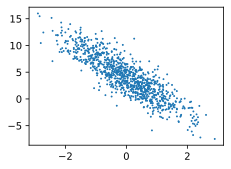

In [7]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2299, -0.2069],
        [ 0.9812, -2.1261],
        [ 0.1226, -1.2288],
        [ 0.6636, -0.4078],
        [ 1.6290,  0.2559],
        [-0.4595,  0.5944],
        [ 0.1676,  0.2590],
        [ 0.5666, -1.4085],
        [-1.6426, -2.8071],
        [ 1.4347,  0.4916]]) 
 tensor([[ 4.4466],
        [13.3911],
        [ 8.6279],
        [ 6.9033],
        [ 6.5830],
        [ 1.2582],
        [ 3.6508],
        [10.1213],
        [10.4521],
        [ 5.3950]])


In [10]:
data_iter(batch_size, features, labels)

<generator object data_iter at 0x7f913a09d270>

In [11]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

w, b

(tensor([[0.0005],
         [0.0028]], requires_grad=True),
 tensor([0.], requires_grad=True))